# Analyzing PBMCs of Covid patients and healthy controls

## Load libraries

In [124]:
import scanpy as sc
import os

import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

# Load the data

Make sure we are in the correct working directory

In [3]:
os.getcwd() #get current working directory

'C:\\Users\\Nastavnik\\S3_project\\DDD_disk\\notebooks'

In [4]:
# change working directory
os.chdir('C:\\Users\\Nastavnik\\S3_project\\DDD_disk')

In [5]:
# Load count matrices for all samples (cells by genes)
adata_cov1 = sc.read_10x_h5("data/nCoV_PBMC_1.h5")
adata_cov2 = sc.read_10x_h5("data/nCoV_PBMC_15.h5")
adata_cov3 = sc.read_10x_h5("data/nCoV_PBMC_17.h5")
adata_norm1 = sc.read_10x_h5("data/Normal_PBMC_13.h5")
adata_norm2 = sc.read_10x_h5("data/Normal_PBMC_14.h5")
adata_norm3 = sc.read_10x_h5("data/Normal_PBMC_5.h5")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site

In [6]:
pd.Series(list(adata_cov1.var['gene_ids'])).value_counts()

ENSG00000243485    1
ENSG00000080166    1
ENSG00000224394    1
ENSG00000183098    1
ENSG00000278177    1
                  ..
ENSG00000135336    1
ENSG00000146282    1
ENSG00000164414    1
ENSG00000213204    1
ENSG00000268674    1
Length: 33538, dtype: int64

In [7]:
adata_cov1.var.loc['PDE11A']

,gene_ids,feature_types,genome
PDE11A,ENSG00000128655,Gene Expression,GRCh38
PDE11A,ENSG00000284741,Gene Expression,GRCh38


In [8]:
# Make variable names (gene names) unique
adata_cov1.var_names_make_unique()
adata_cov2.var_names_make_unique()
adata_cov3.var_names_make_unique()
adata_norm1.var_names_make_unique()
adata_norm2.var_names_make_unique()
adata_norm3.var_names_make_unique()

In [9]:
adata_cov1.var.loc[adata_cov1.var_names.str.startswith('PDE11A'),:]

,gene_ids,feature_types,genome
PDE11A,ENSG00000128655,Gene Expression,GRCh38
PDE11A-1,ENSG00000284741,Gene Expression,GRCh38


In [10]:
adata_cov1.obs["sample"] = "cov1"
adata_cov2.obs["sample"] = "cov2"
adata_cov3.obs["sample"] = "cov3"
adata_norm1.obs["sample"] = "norm1"
adata_norm2.obs["sample"] = "norm2"
adata_norm3.obs["sample"] = "norm3"

In [11]:
adata_cov1.obs["condition"] = "covid"
adata_cov2.obs["condition"] = "covid"
adata_cov3.obs["condition"] = "covid"
adata_norm1.obs["condition"] = "control"
adata_norm2.obs["condition"] = "control"
adata_norm3.obs["condition"] = "control"

Concatenate all objects (combine adata objects into one)

In [12]:
adata = adata_cov1.concatenate(adata_cov2, adata_cov3,
                      adata_norm1, adata_norm2,
                      adata_norm3)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [13]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [14]:
adata.obs

,sample,condition,batch
AGGGTCCCATGACCCG-1-0,cov1,covid,0
TACCCACAGCGGGTTA-1-0,cov1,covid,0
CCCAACTTCATATGGC-1-0,cov1,covid,0
TCAAGTGTCCGAACGC-1-0,cov1,covid,0
ATTCCTAGTGACTGTT-1-0,cov1,covid,0
...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5
TGACCCTGTAGATTAG-5-5,norm3,control,5
TCCTTTCGTAAGGCCA-5-5,norm3,control,5
CTACCCACACGACCTG-5-5,norm3,control,5


In [15]:
adata.X

<9000x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 12963069 stored elements in Compressed Sparse Row format>

In [16]:
adata.X = adata.X.toarray()

In [17]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Data QC

In [18]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [19]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

In [20]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]

In [21]:
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

In [22]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'

In [23]:
adata.obs

,sample,condition,batch,n_counts,log_counts,n_genes,mt_frac
AGGGTCCCATGACCCG-1-0,cov1,covid,0,7698.0,8.948716,2140,0.068200
TACCCACAGCGGGTTA-1-0,cov1,covid,0,13416.0,9.504204,3391,0.070960
CCCAACTTCATATGGC-1-0,cov1,covid,0,16498.0,9.710995,3654,0.075949
TCAAGTGTCCGAACGC-1-0,cov1,covid,0,1425.0,7.261927,608,0.098947
ATTCCTAGTGACTGTT-1-0,cov1,covid,0,7535.0,8.927314,1808,0.062376
...,...,...,...,...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5,6479.0,8.776321,1941,0.080259
TGACCCTGTAGATTAG-5-5,norm3,control,5,5335.0,8.582045,1867,0.091471
TCCTTTCGTAAGGCCA-5-5,norm3,control,5,4596.0,8.432941,1486,0.100087
CTACCCACACGACCTG-5-5,norm3,control,5,6766.0,8.819665,1691,0.057789


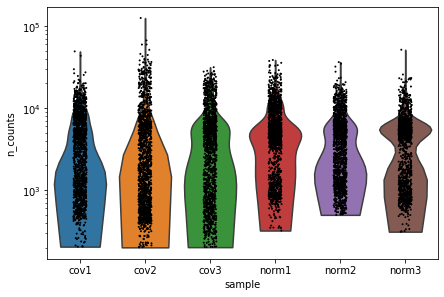

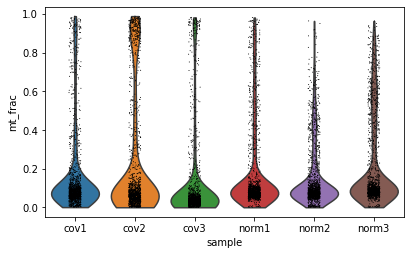

In [24]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

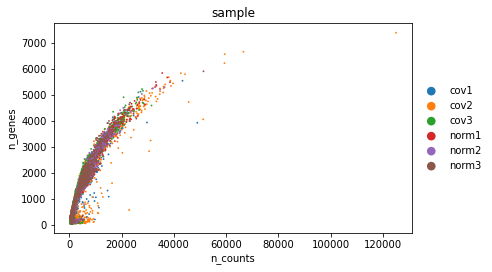

In [25]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='sample')

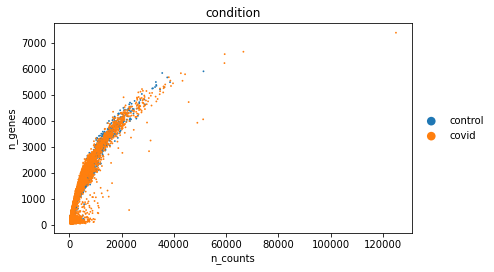

In [26]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='condition')

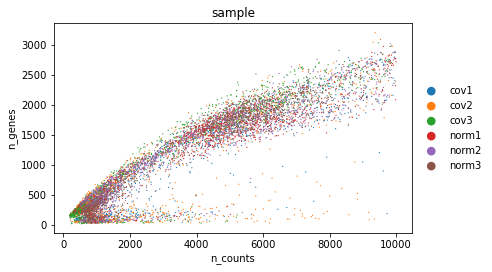

In [27]:
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='sample',
                  size=6)

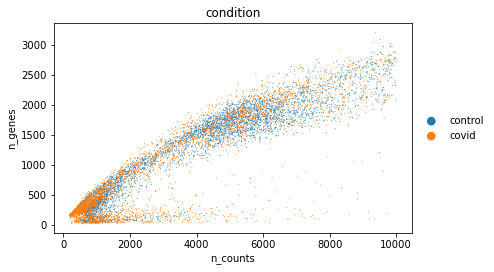

In [28]:
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='condition',
                  size=4)

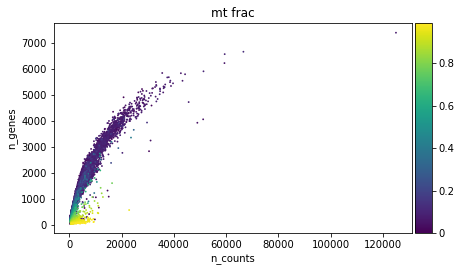

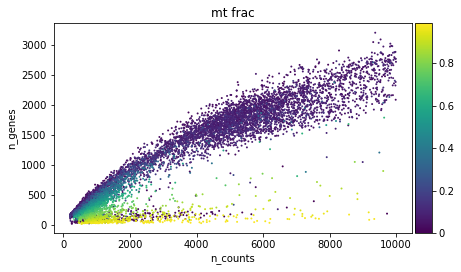

In [29]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='mt_frac')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


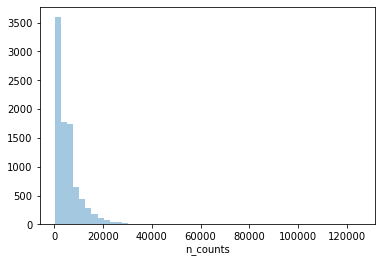

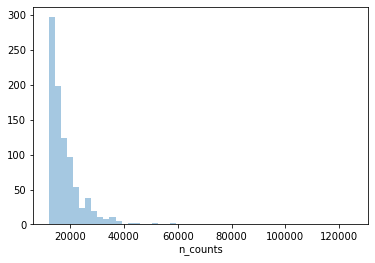

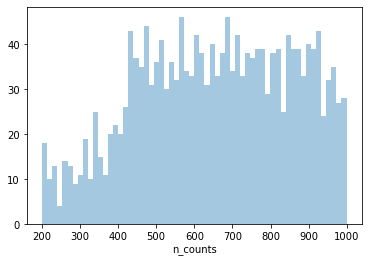

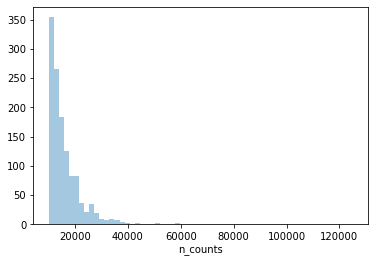

In [30]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>12000], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<1000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [31]:
# n_counts_upper = 32000
# n_counts_upper = 25000

# n_counts_lower = 450



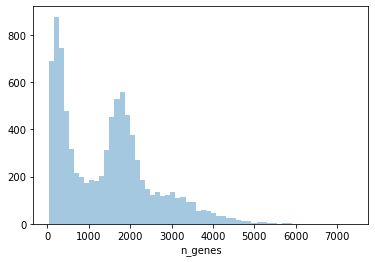

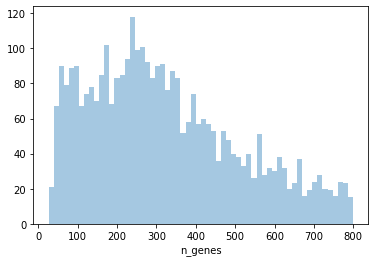

In [32]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<800], kde=False, bins=60)
plt.show()


In [33]:
# n_genes_lower = 150
# n_genes_lower = 200

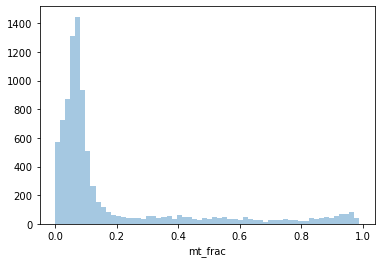

In [34]:
p8 = sb.distplot(adata.obs['mt_frac'], kde=False, bins=60)
plt.show()

In [35]:
# mt_frac_upper = 0.2

In [36]:
adata.obs['sample'].unique()

['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']
Categories (6, object): ['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']

In [37]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

In [38]:
adata_subset

View of AnnData object with n_obs × n_vars = 1500 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors', 'condition_colors'

In [39]:
adata_subset.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
ACTCCCAAGATGCGAC-1-0     7616.0
AGTGCCGGTTGGTAGG-1-0      472.0
CCCATTGAGGCCCGTT-1-0      770.0
CAACGGCGTCGGCTAC-1-0     8308.0
ATCACTTGTAGGCAAC-1-0      454.0
Name: n_counts, Length: 1500, dtype: float32

In [40]:
adata.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
GTCACTCCACTCTCGT-5-5     6479.0
TGACCCTGTAGATTAG-5-5     5335.0
TCCTTTCGTAAGGCCA-5-5     4596.0
CTACCCACACGACCTG-5-5     6766.0
CTGAGCGTCAAACCTG-5-5     3393.0
Name: n_counts, Length: 9000, dtype: float32

In [41]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


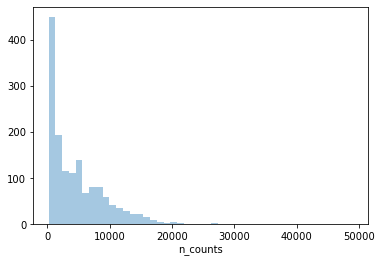

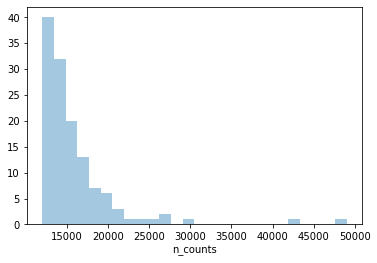

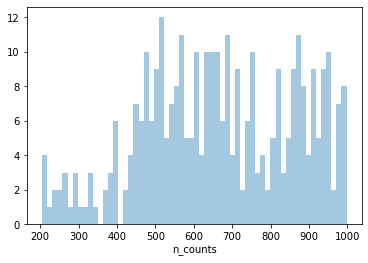

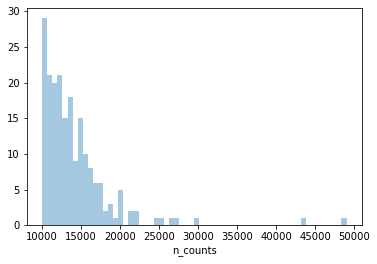

In [42]:
#Thresholding decision: counts
p3 = sb.distplot(adata_subset.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>12000], kde=False)
plt.show()

p4 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<1000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [43]:
# cov1
# n_count_upper_1
# n_count_upper_2

# n_count_lower_1
# n_count_lower_2

# n_genes_lower

# mt_frac

## Filtering cells

### All samples - manual

In [44]:
# all samples together - manual thresholding
n_counts_upper_1 = 32000
n_counts_upper_2 = 25000

n_counts_lower = 450

n_genes_lower_1 = 150
n_genes_lower_2 = 200

mt_frac_lower = 0.2

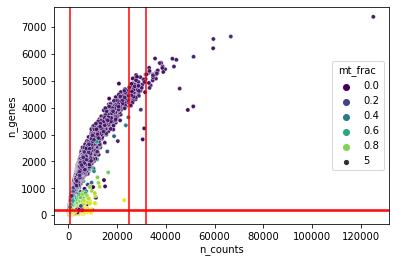

In [45]:
sb.scatterplot(data=adata.obs,
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=n_counts_lower, c="red")
plt.axvline(x=n_counts_upper_1, c="red")
plt.axvline(x=n_counts_upper_2, c="red")

plt.axhline(y=n_genes_lower_1, c="red")
plt.axhline(y=n_genes_lower_2, c="red")

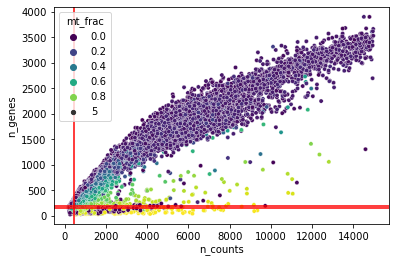

In [46]:
sb.scatterplot(data=adata.obs[adata.obs['n_counts']<15000],
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=n_counts_lower, c="red")

plt.axhline(y=n_genes_lower_1, c="red")
plt.axhline(y=n_genes_lower_2, c="red")

In [93]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

adata_flt_all_man = adata[adata.obs['n_counts']>n_counts_lower,:]
print('Number of cells after min count filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['n_counts']<n_counts_upper_1,:]
print('Number of cells after max count filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['mt_frac'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['n_genes'] > n_genes_lower_1]
print('Number of cells after gene filter: {:d}'.format(adata_flt_all_man.n_obs))

Total number of cells: 9000
Number of cells after min count filter: 8673
Number of cells after max count filter: 8638
Number of cells after MT filter: 6732
Number of cells after gene filter: 6513


In [94]:
# np.logical_and((adata.obs['n_counts']<n_counts_upper_1),
#                (adata.obs['n_counts']>n_counts_lower), 
#               )

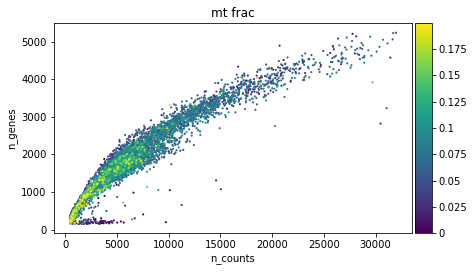

In [95]:
p1 = sc.pl.scatter(adata_flt_all_man, 'n_counts', 'n_genes', color='mt_frac')

In [96]:
adata_flt_all_man

View of AnnData object with n_obs × n_vars = 6513 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors', 'condition_colors'

## Filter genes


In [97]:
sc.pp.filter_genes(adata_flt_all_man, min_cells=20)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [98]:
adata_flt_all_man

AnnData object with n_obs × n_vars = 6513 × 14047
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'sample_colors', 'condition_colors'

In [99]:
# Save raw counts in raw
adata_flt_all_man.layers['raw'] = adata_flt_all_man.X.copy()

## Normalization

In [100]:
sc.pp.normalize_per_cell(adata_flt_all_man, counts_per_cell_after=10e4)

## Doublet detection 

In [101]:
sc.external.pp.scrublet(adata_flt_all_man, batch_key="sample")


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 25.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.9%


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 16.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.3%


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 38.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 35.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 3.6%
Estimated detectable doublet fraction = 41.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.7%


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 24.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.3%


In [102]:
adata_flt_all_man.obs

,sample,condition,batch,n_counts,log_counts,n_genes,mt_frac,doublet_score,predicted_doublet
AGGGTCCCATGACCCG-1-0,cov1,covid,0,7691.0,8.948716,2130,0.068200,0.016977,False
TACCCACAGCGGGTTA-1-0,cov1,covid,0,13411.0,9.504204,3386,0.070960,0.038554,False
CCCAACTTCATATGGC-1-0,cov1,covid,0,16484.0,9.710995,3640,0.075949,0.038554,False
TCAAGTGTCCGAACGC-1-0,cov1,covid,0,1425.0,7.261927,607,0.098947,0.091304,False
ATTCCTAGTGACTGTT-1-0,cov1,covid,0,7528.0,8.927314,1802,0.062376,0.014493,False
...,...,...,...,...,...,...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5,6475.0,8.776321,1937,0.080259,0.085339,False
TGACCCTGTAGATTAG-5-5,norm3,control,5,5330.0,8.582045,1862,0.091471,0.057851,False
TCCTTTCGTAAGGCCA-5-5,norm3,control,5,4589.0,8.432941,1479,0.100087,0.014587,False
CTACCCACACGACCTG-5-5,norm3,control,5,6757.0,8.819665,1682,0.057789,0.032407,False


C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


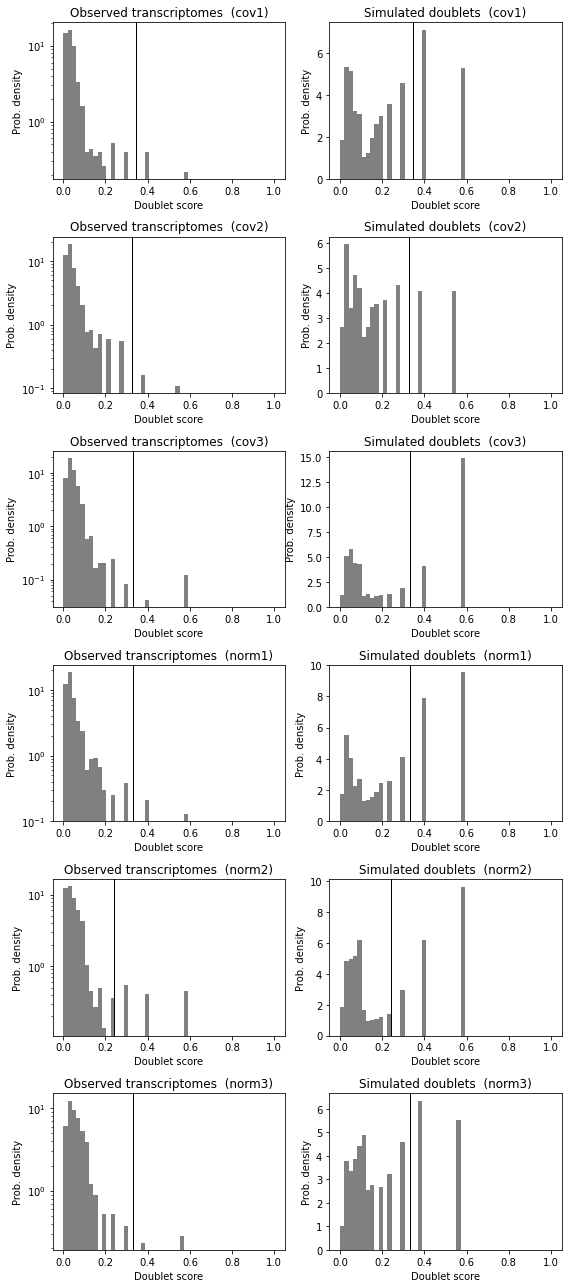

In [103]:
sc.external.pl.scrublet_score_distribution(adata_flt_all_man)

C:\Users\Nastavnik\AppData\Local\Temp\ipykernel_9568\3289818772.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


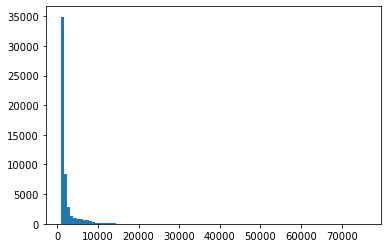

In [104]:
plt.hist(adata_flt_all_man.X.flatten()[adata_flt_all_man.X.flatten()>1000], 100)
plt.show()

In [105]:
sc.pp.log1p(adata_flt_all_man)

C:\Users\Nastavnik\AppData\Local\Temp\ipykernel_9568\1997544405.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


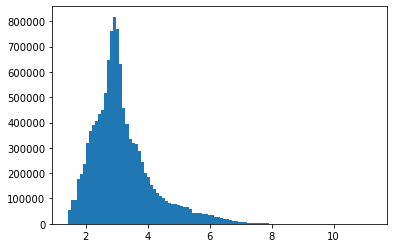

In [106]:
plt.hist(adata_flt_all_man.X.flatten()[adata_flt_all_man.X.flatten()>0], 100)
plt.show()

In [107]:
sc.pp.highly_variable_genes(adata_flt_all_man, flavor="seurat")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


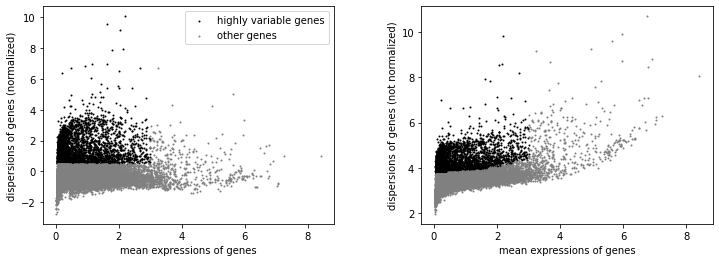

In [108]:
sc.pl.highly_variable_genes(adata_flt_all_man)

In [109]:
sum(adata_flt_all_man.var["highly_variable"])

2954

In [110]:
sc.pp.highly_variable_genes(adata_flt_all_man, flavor="cell_ranger")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


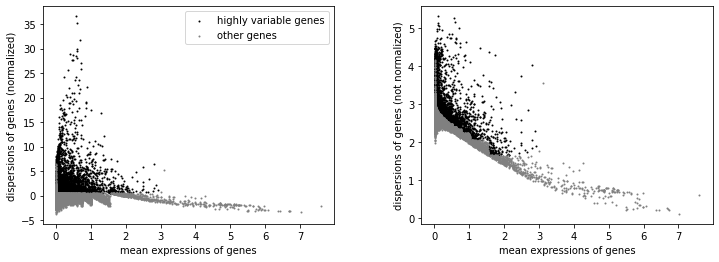

In [111]:
sc.pl.highly_variable_genes(adata_flt_all_man)

In [112]:
sum(adata_flt_all_man.var["highly_variable"])

4296

## Dimesnion reduction

In [113]:
sc.pp.pca(adata_flt_all_man, use_highly_variable=True)

In [89]:
adata_flt_all_man.obsm["X_pca"]

array([[-6.6708736e+00,  1.9474344e+00,  1.6461931e+01, ...,
        -2.1869953e+00,  1.6034635e+00,  2.8380723e+00],
       [ 3.7586441e+01, -3.0015554e+00, -2.9263618e+00, ...,
         4.9639311e-01,  3.1481087e-01,  7.3212129e-01],
       [ 3.2550560e+01,  3.3825989e+00, -7.2621679e+00, ...,
         8.8361692e-01,  6.8150669e-02,  4.4260246e-01],
       ...,
       [-1.3167012e+01,  9.7048032e-01,  2.6045330e+01, ...,
         7.6730019e-01, -2.6998348e+00,  2.2787852e+00],
       [-1.2837508e+01, -9.4910152e-03,  2.3819473e+01, ...,
        -1.9442898e+00, -1.9344671e+00,  1.1850860e+00],
       [-1.8204784e+01, -7.8433685e+00, -6.9370012e+00, ...,
         1.7133195e+00, -6.1895394e-01,  3.5479975e+00]], dtype=float32)

## Visualization

In [115]:
# Calculate the visualizations
sc.pp.neighbors(adata_flt_all_man)

In [118]:
sc.tl.tsne(adata_flt_all_man, n_jobs=12) #Note n_jobs works for MulticoreTSNE, but not regular implementation)
sc.tl.umap(adata_flt_all_man)
sc.tl.diffmap(adata_flt_all_man)
sc.tl.draw_graph(adata_flt_all_man)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\tools\_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [117]:
adata_flt_all_man

AnnData object with n_obs × n_vars = 6513 × 14047
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'condition_colors', 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

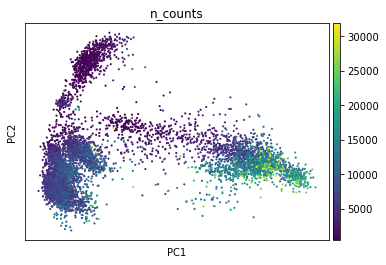

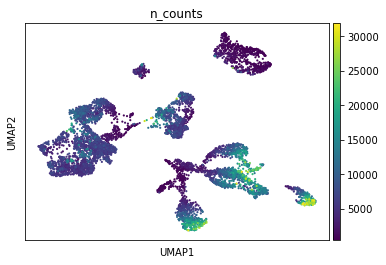

In [120]:
sc.pl.pca_scatter(adata_flt_all_man, color='n_counts')
#sc.pl.tsne(adata_flt_all_man, color='n_counts')
sc.pl.umap(adata_flt_all_man, color='n_counts')
#sc.pl.diffmap(adata_flt_all_man, color='n_counts', components=['1,2','1,3'])
#sc.pl.draw_graph(adata_flt_all_man, color='n_counts')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


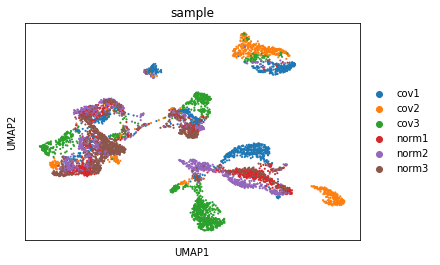

In [121]:
sc.pl.umap(adata_flt_all_man, color='sample')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


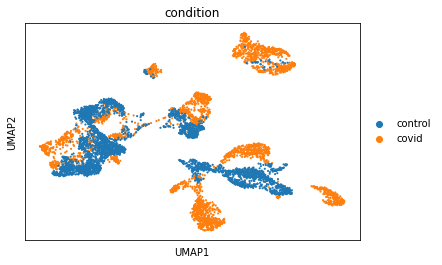

In [122]:
sc.pl.umap(adata_flt_all_man, color='condition')

## Integration

In [126]:
# ComBat batch correction
sc.pp.combat(adata_flt_all_man, key='sample')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\preprocessing\_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [127]:
sc.pp.pca(adata_flt_all_man, use_highly_variable=True)
sc.pp.neighbors(adata_flt_all_man)
sc.tl.umap(adata_flt_all_man)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


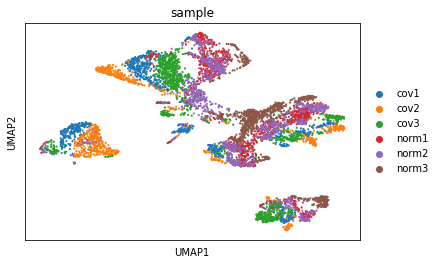

In [128]:
sc.pl.umap(adata_flt_all_man,
          color="sample")

In [129]:
# Harmony

sc.external.pp.harmony_integrate(adata_flt_all_man, key="sample")

2022-08-12 15:23:15,513 - harmonypy - INFO - Iteration 1 of 10
2022-08-12 15:23:17,242 - harmonypy - INFO - Iteration 2 of 10
2022-08-12 15:23:18,885 - harmonypy - INFO - Iteration 3 of 10
2022-08-12 15:23:20,452 - harmonypy - INFO - Iteration 4 of 10
2022-08-12 15:23:21,976 - harmonypy - INFO - Iteration 5 of 10
2022-08-12 15:23:22,870 - harmonypy - INFO - Iteration 6 of 10
2022-08-12 15:23:24,394 - harmonypy - INFO - Iteration 7 of 10
2022-08-12 15:23:25,927 - harmonypy - INFO - Iteration 8 of 10
2022-08-12 15:23:27,479 - harmonypy - INFO - Iteration 9 of 10
2022-08-12 15:23:28,700 - harmonypy - INFO - Converged after 9 iterations


In [130]:
sc.pp.neighbors(adata_flt_all_man, use_rep="X_pca_harmony")
sc.tl.umap(adata_flt_all_man)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


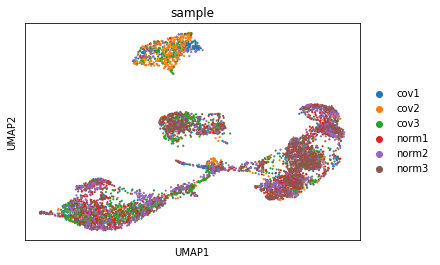

In [131]:
sc.pl.umap(adata_flt_all_man,
          color="sample")

In [132]:
adata_flt_all_man

AnnData object with n_obs × n_vars = 6513 × 14047
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'condition_colors', 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'tsne', 'umap', 'diffmap_evals', 'draw_graph'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_diffmap', 'X_draw_graph_fr', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

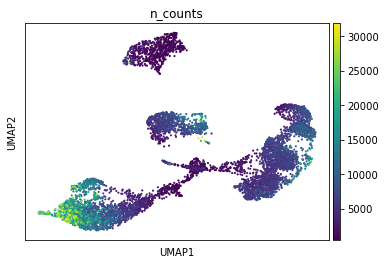

In [133]:
sc.pl.umap(adata_flt_all_man,
          color="n_counts")

## Clustering

In [134]:
sc.tl.leiden(adata_flt_all_man, resolution=0.5, key_added="leiden0.5")
sc.tl.leiden(adata_flt_all_man, resolution=0.8, key_added="leiden0.8")
sc.tl.leiden(adata_flt_all_man, key_added="leiden1.0")
sc.tl.leiden(adata_flt_all_man, resolution=1.3, key_added="leiden1.3")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


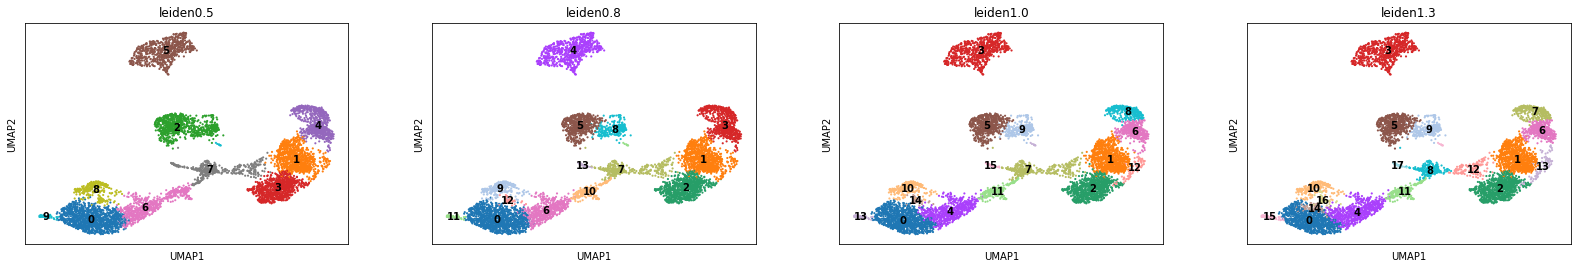

In [135]:
sc.pl.umap(adata_flt_all_man,
          color=["leiden0.5", "leiden0.8", "leiden1.0", "leiden1.3"],
          legend_loc="on data")

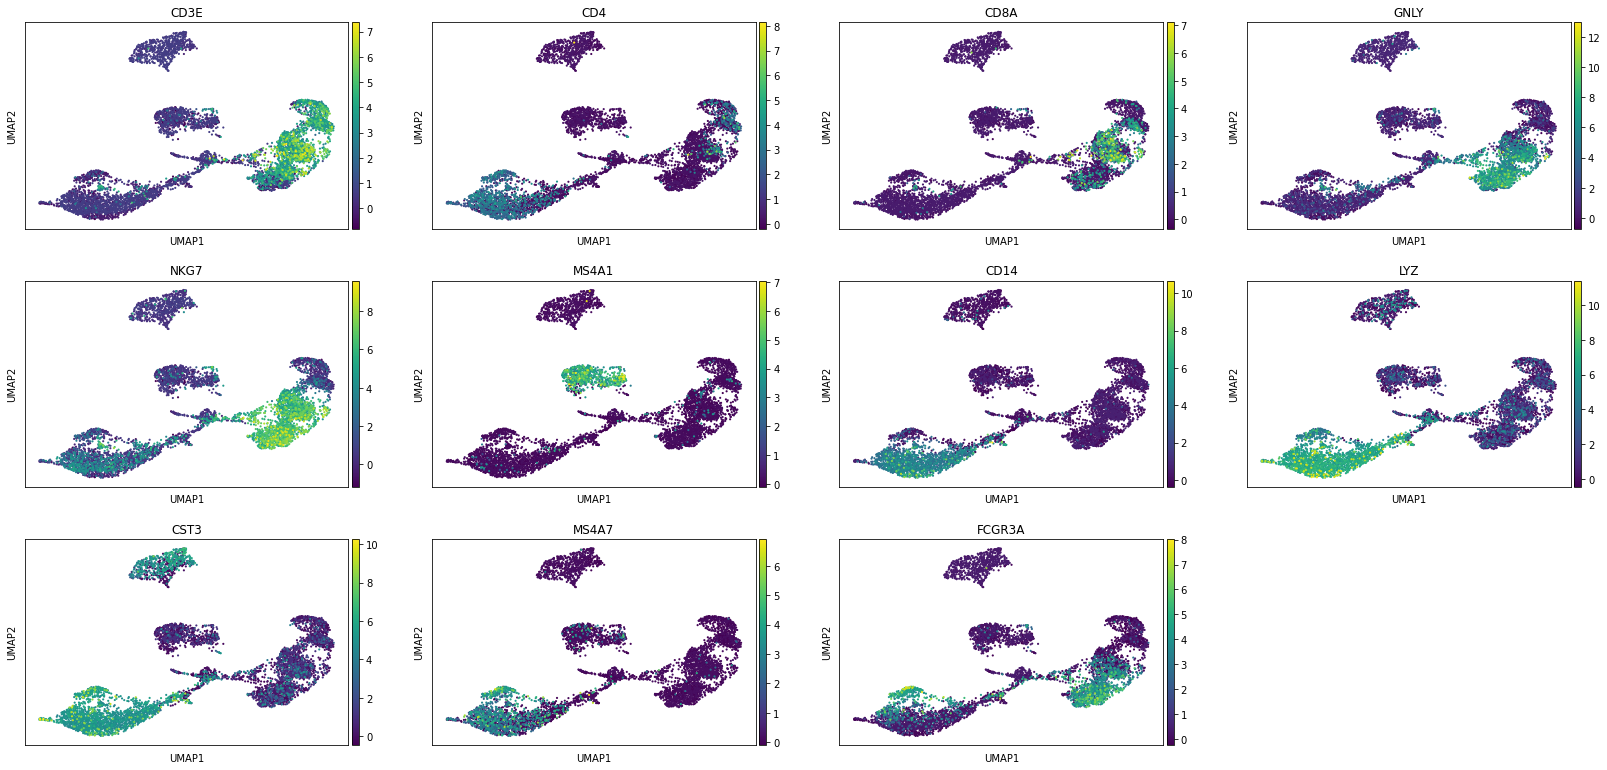

In [136]:
sc.pl.umap(adata_flt_all_man,
          color=["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1",
                 "CD14","LYZ","CST3","MS4A7","FCGR3A"])

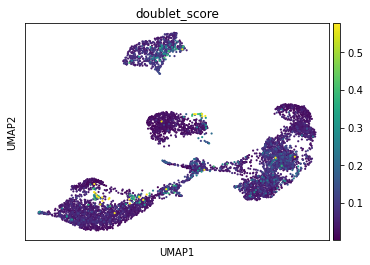

In [137]:
sc.pl.umap(adata_flt_all_man,
          color=["doublet_score"])

In [138]:
adata_flt_all_man

AnnData object with n_obs × n_vars = 6513 × 14047
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'doublet_score', 'predicted_doublet', 'leiden0.5', 'leiden0.8', 'leiden1.0', 'leiden1.3'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'condition_colors', 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'tsne', 'umap', 'diffmap_evals', 'draw_graph', 'leiden', 'leiden0.5_colors', 'leiden0.8_colors', 'leiden1.0_colors', 'leiden1.3_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_diffmap', 'X_draw_graph_fr', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

In [142]:
adata_flt_all_man.obs["is_doublet"] = [str(v) for v in adata_flt_all_man.obs["predicted_doublet"]]

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


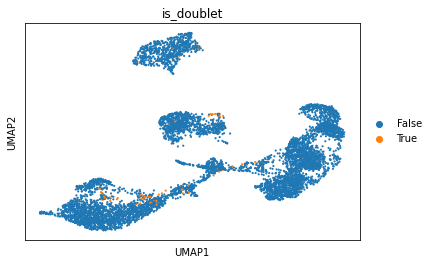

In [143]:
sc.pl.umap(adata_flt_all_man, color="is_doublet")

In [144]:
celltype_map = {
    
    "0":"CD14+ Monocytes",
    "1":"CD8 T / CD4 T",
    "2":"B cells",
    "3":"NK cells",
    "4":"T cells (CD4)",
    "5":"??",
    "6":"CD14+ Monocytes (+some other?)",
    "7":"??",
    "8":"FCGR3A+ Monocytes",
    "9":"DCs"
}

In [146]:
adata_flt_all_man.obs["cell_type"] = adata_flt_all_man.obs["leiden0.5"].map(celltype_map)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\plotting\_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


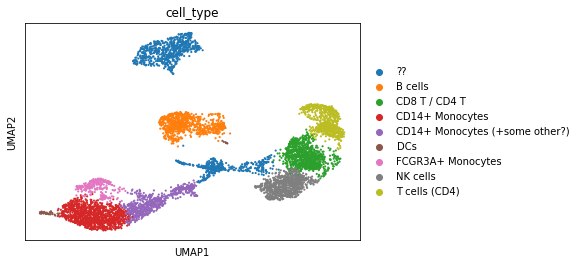

In [147]:
sc.pl.umap(adata_flt_all_man, color="cell_type")

In [148]:
pd.crosstab(adata_flt_all_man.obs["condition"], adata_flt_all_man.obs["cell_type"])

cell_type,??,B cells,CD8 T / CD4 T,CD14+ Monocytes,CD14+ Monocytes (+some other?),DCs,FCGR3A+ Monocytes,NK cells,T cells (CD4)
condition,,,,,,,,,
control,211,377,683,429,260,39,201,594,507
covid,879,453,275,733,392,8,63,232,177


Markers | Cell Type
--- | ---
CD3E    | T cells
CD3E CD4    | CD4+ T cells
CD3E CD8A   | CD8+ T cells
GNLY, NKG7  | NK cells
MS4A1   | B cells
CD14, LYZ, CST3, MS4A7  | CD14+ Monocytes
FCGR3A, LYZ, CST3, MS4A7    | FCGR3A+  Monocytes
FCER1A, CST3 | DCs


### All samples Auto

In [ ]:
adata.obs['log_n_genes'] = np.log1p(adata.obs['n_genes'])

In [ ]:
def determine_threshold (adata, n = 3, mode = 'mad', min = True, max = True, ngene_tresh = True):
    if mode == 'mad':
        if min:
            min_threshold = np.median(adata.obs['log_counts']) - n * \
            np.median(np.absolute(adata.obs['log_counts'] - np.median(adata.obs['log_counts'])))
        if max:
            max_threshold = np.median(adata.obs['log_counts']) + n * \
            np.median(np.absolute(adata.obs['log_counts'] - np.median(adata.obs['log_counts'])))
        if ngene_tresh:
            min_ngenes_threshold = np.median(adata.obs['log_n_genes']) - n * \
            np.median(np.absolute(adata.obs['log_n_genes'] - np.median(adata.obs['log_n_genes'])))
        return min_threshold, max_threshold, min_ngenes_threshold

In [ ]:
determine_threshold(adata)

(5.9967756271362305, 10.73107624053955, 5.405321030458634)

In [ ]:
def qc_count (adata, min = True, max = True, mt = False, max_mt_frac = None, n = 3, ngene_tresh = True):
    if min:
        min_value = determine_threshold(adata, n = n)[0]
        print(min_value)
        print(np.exp(min_value))
        adata = adata[adata.obs['log_counts'] > min_value, :]
        print (adata.shape)
    if max:
        max_value = determine_threshold(adata, n = n)[1]
        print(max_value)
        print(np.exp(max_value))
        adata = adata[adata.obs['log_counts'] < max_value, :]
        print (adata.shape)
    if ngene_tresh:
        min_ngenes_threshold = determine_threshold(adata, n = n)[2]
        print(min_ngenes_threshold)
        print(np.exp(min_ngenes_threshold))
        adata = adata[adata.obs['log_n_genes'] > min_ngenes_threshold, :]
        print (adata.shape)
    if mt:
        adata = adata[adata.obs['mt_frac'] < max_mt_frac, :]
        print (adata.shape)
    return adata

In [ ]:
adata_flt_all_auto = qc_count(adata, mt = True, max_mt_frac = 0.2)

5.9967756271362305
402.1300835262991
(8784, 33538)
10.657384395599365
42505.31456145271
(8773, 33538)
5.5415447972392755
255.07172936716063
(7542, 33538)
(6409, 33538)


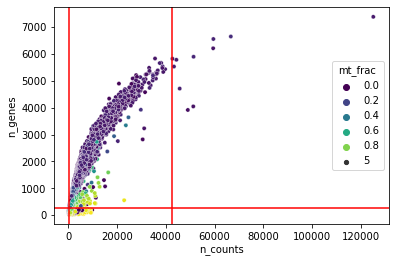

In [ ]:
sb.scatterplot(data=adata.obs,
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=402.13, c="red")
plt.axvline(x=42505.31, c="red")

plt.axhline(y=255.07, c="red")

In [ ]:
adata_flt_all_auto

View of AnnData object with n_obs × n_vars = 6852 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors', 'condition_colors'

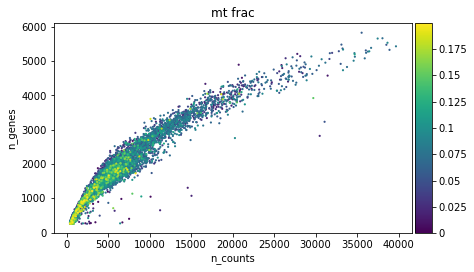

In [ ]:
p1 = sc.pl.scatter(adata_flt_all_auto, 'n_counts', 'n_genes', color='mt_frac')

### Per samples - manual

In [ ]:
adata.obs['sample'].unique()

['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']
Categories (6, object): ['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']

In [ ]:
threshold_dict = {
    "cov1":{"n_counts_lower_1":450,
            "n_counts_lower_2":700,
            
            "n_counts_upper_1":18000,
            "n_counts_upper_2":19000,
            
            "n_genes_lower_1":150,
            "n_genes_lower_2":300,
            
            "mt_fraq":0.2,
           },
    "cov2":{"n_counts_lower_1":400,
            "n_counts_lower_2":np.nan,
            
            "n_counts_upper_1":20000,
            "n_counts_upper_2":25000,
            
            "n_genes_lower_1":250,
            "n_genes_lower_2":np.nan,
            
            "mt_fraq":0.2,
           },
    "cov3":{"n_counts_lower_1":800,
            "n_counts_lower_2":np.nan,
            
            "n_counts_upper_1":10000,
            "n_counts_upper_2":7500,
            
            "n_genes_lower_1":100,
            "n_genes_lower_2":np.nan,
            
            "mt_fraq":0.1,
           },
    "norm1":{"n_counts_lower_1":800,
            "n_counts_lower_2":np.nan,
            
            "n_counts_upper_1":6500,
            "n_counts_upper_2":8500,
            
            "n_genes_lower_1":200,
            "n_genes_lower_2":np.nan,
            
            "mt_fraq":0.2,
           },
    "norm2":{"n_counts_lower_1":750,
            "n_counts_lower_2":np.nan,
            
            "n_counts_upper_1":18000,
            "n_counts_upper_2":np.nan,
            
            "n_genes_lower_1":350,
            "n_genes_lower_2":250,
            
            "mt_fraq":0.2,
           },
    "norm3":{"n_counts_lower_1":3000,
            "n_counts_lower_2":500,
            
            "n_counts_upper_1":20000,
            "n_counts_upper_2":np.nan,
            
            "n_genes_lower_1":350,
            "n_genes_lower_2":100,
            
            "mt_fraq":0.2,
           }
    
}



In [ ]:
threshold_dict


{'cov1': {'n_counts_lower_1': 450,
  'n_counts_lower_2': 700,
  'n_counts_upper_1': 18000,
  'n_counts_upper_2': 19000,
  'n_genes_lower_1': 150,
  'n_genes_lower_2': 300,
  'mt_fraq': 0.2},
 'cov2': {'n_counts_lower_1': 400,
  'n_counts_lower_2': nan,
  'n_counts_upper_1': 20000,
  'n_counts_upper_2': 25000,
  'n_genes_lower_1': 250,
  'n_genes_lower_2': nan,
  'mt_fraq': 0.2},
 'cov3': {'n_counts_lower_1': 800,
  'n_counts_lower_2': nan,
  'n_counts_upper_1': 10000,
  'n_counts_upper_2': 7500,
  'n_genes_lower_1': 100,
  'n_genes_lower_2': nan,
  'mt_fraq': 0.1},
 'norm1': {'n_counts_lower_1': 800,
  'n_counts_lower_2': nan,
  'n_counts_upper_1': 6500,
  'n_counts_upper_2': 8500,
  'n_genes_lower_1': 200,
  'n_genes_lower_2': nan,
  'mt_fraq': 0.2},
 'norm2': {'n_counts_lower_1': 750,
  'n_counts_lower_2': nan,
  'n_counts_upper_1': 18000,
  'n_counts_upper_2': nan,
  'n_genes_lower_1': 350,
  'n_genes_lower_2': 250,
  'mt_fraq': 0.2},
 'norm3': {'n_counts_lower_1': 3000,
  'n_counts

In [ ]:
threshold_dict.keys()

dict_keys(['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3'])

cov1


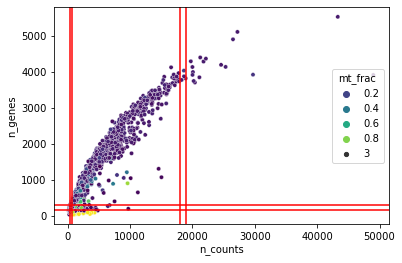

cov2


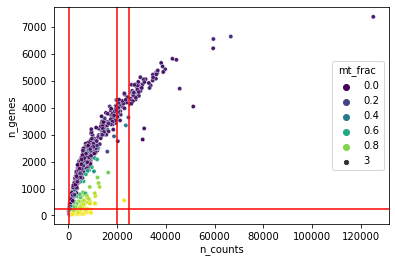

cov3


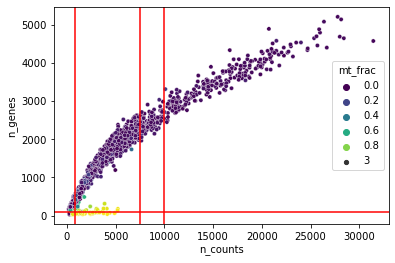

norm1


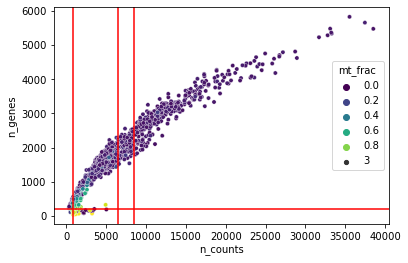

norm2


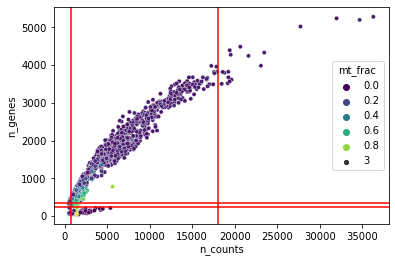

norm3


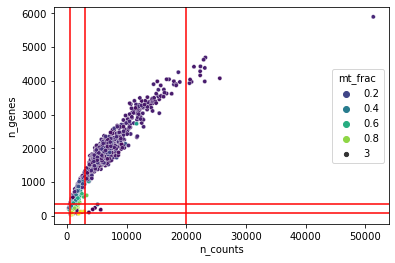

In [ ]:
for samp in threshold_dict.keys():
    
    print(samp)
    
    adata_sub = adata[adata.obs['sample']==samp]
    sb.scatterplot(data=adata_sub.obs,
                   x='n_counts',
                   y='n_genes',
                   hue='mt_frac',
                   palette="viridis",
                   size=3
                  )
    #n_counts_upper
    plt.axvline(x=threshold_dict[samp]["n_counts_upper_1"], c="red")
    if not np.isnan(threshold_dict[samp]["n_counts_upper_2"]):
        plt.axvline(x=threshold_dict[samp]["n_counts_upper_2"], c="red")
    
    #n_counts_lower
    plt.axvline(x=threshold_dict[samp]["n_counts_lower_1"], c="red")
    if not np.isnan(threshold_dict[samp]["n_counts_lower_2"]):
        plt.axvline(x=threshold_dict[samp]["n_counts_lower_2"], c="red")
    
    #n_genes_lower
    plt.axhline(y=threshold_dict[samp]["n_genes_lower_1"], c="red")
    if not np.isnan(threshold_dict[samp]["n_genes_lower_2"]):
        plt.axhline(y=threshold_dict[samp]["n_genes_lower_2"], c="red")
    
    plt.show()


### Per samples - auto

cov1
cov2
cov3
norm1
norm2
norm3


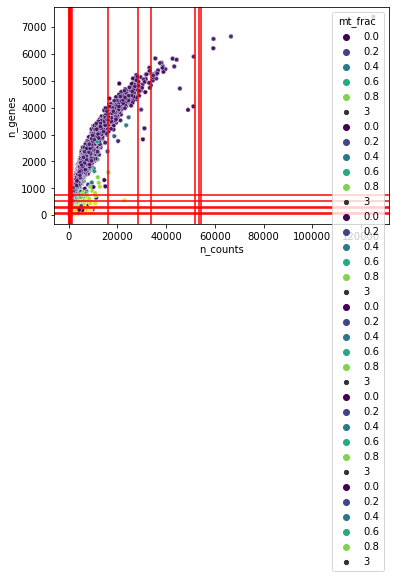

In [ ]:
for samp in threshold_dict.keys():
    
    print(samp)
    
    adata_sub = adata[adata.obs['sample']==samp]
    
    min_threshold, max_threshold, min_ngenes_threshold = determine_threshold(adata_sub)
    
    sb.scatterplot(data=adata.obs,
                   x='n_counts',
                   y='n_genes',
                   hue='mt_frac',
                   palette="viridis",
                   size=3
                  )
    #n_counts_upper
    plt.axvline(x=np.exp(max_threshold), c="red")
    
    #n_counts_lower
    plt.axvline(x=np.exp(min_threshold), c="red")
    
    #n_genes_lower
    plt.axhline(y=np.exp(min_ngenes_threshold), c="red")
    
    #plt.show()


cov1


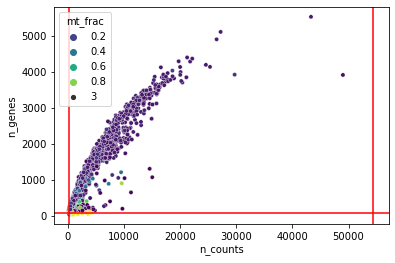

cov2


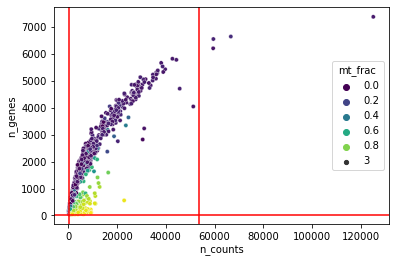

cov3


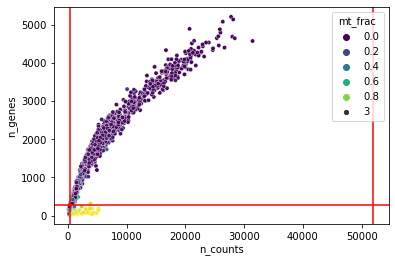

norm1


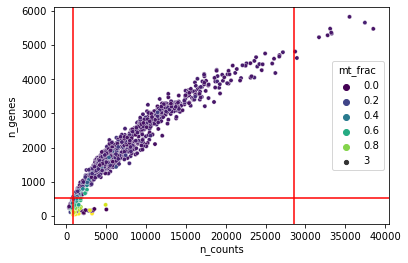

norm2


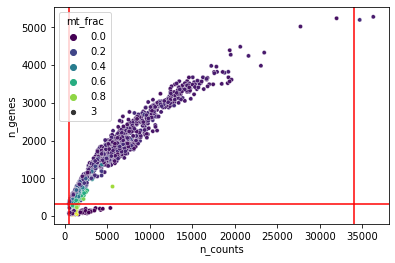

norm3


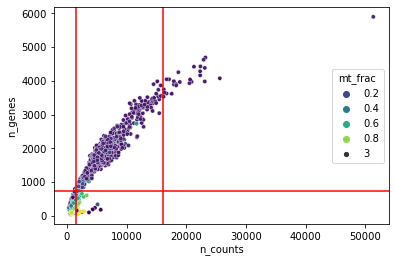

In [ ]:
for samp in threshold_dict.keys():
    
    print(samp)
    
    adata_sub = adata[adata.obs['sample']==samp]
    
    min_threshold, max_threshold, min_ngenes_threshold = determine_threshold(adata_sub)
    
    sb.scatterplot(data=adata_sub.obs,
                   x='n_counts',
                   y='n_genes',
                   hue='mt_frac',
                   palette="viridis",
                   size=3
                  )
    #n_counts_upper
    plt.axvline(x=np.exp(max_threshold), c="red")
    
    #n_counts_lower
    plt.axvline(x=np.exp(min_threshold), c="red")
    
    #n_genes_lower
    plt.axhline(y=np.exp(min_ngenes_threshold), c="red")
    
    plt.show()
